In [61]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [62]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02)
X = X.reshape(X.shape[0], 1)
print(X.shape)
print(X.ndim)
print("printing X")
print(X)

y = weight * X + bias
print("printing y")
print(y)


torch.Size([50, 1])
2
printing X
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
printing y
tensor([[0.3000],
        [0.3140],
        [0.3280],
 

In [63]:
# x = torch.tensor([1, 2, 3, 4])
# print(x)

# print(torch.unsqueeze(x, 0))
# print(torch.unsqueeze(x, -2))
X.shape[0]

50

In [64]:
train_split = int(0.8 * len(X))
print(train_split)
X_train, y_train = X[ : train_split], y[ : train_split]
X_test, y_test = X[train_split : ], y[train_split : ]

40


In [65]:
def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c="b", s=4, label="training_data")

    plt.scatter(test_data, test_label, c="g", s=4, label="test_data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={"size": 14});

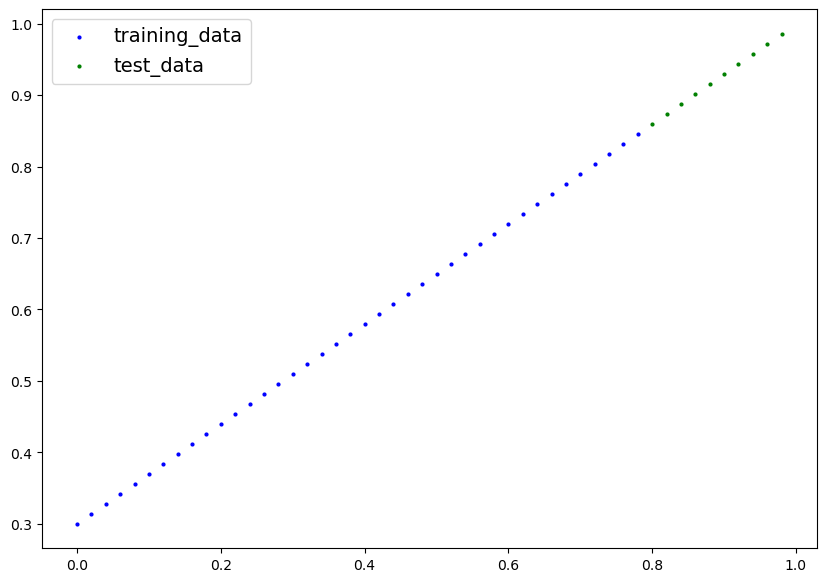

In [66]:
plot_predictions()

In [77]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [85]:
torch.manual_seed = 42

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.0265], requires_grad=True),
 Parameter containing:
 tensor([0.2605], requires_grad=True)]

In [86]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.0265])), ('bias', tensor([0.2605]))])

In [87]:
with torch.inference_mode():
    y_preds = model_0(X_test)

# print(y_preds)
# list(model_0.parameters())

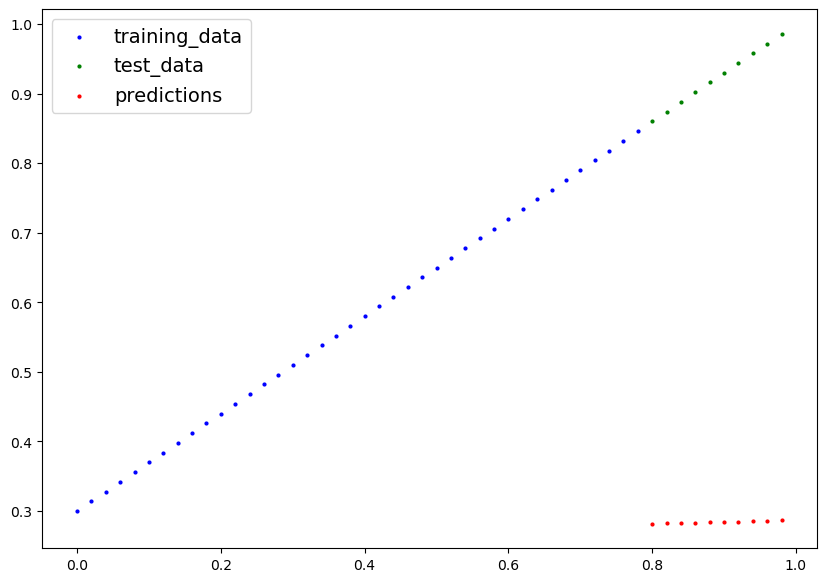

In [88]:
plot_predictions(predictions=y_preds)

In [72]:
# y_test - y_preds


In [89]:
loss_func = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [96]:
torch.manual_seed = 42
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    optimizer.zero_grad()
    
    y_pred = model_0(X_train)
    loss = loss_func(y_pred, y_train)


    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_func(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

    

Epoch: 0 | MAE Train Loss: 0.015610918402671814 | MAE Test Loss: 0.03560042381286621 
Epoch: 10 | MAE Train Loss: 0.01217355951666832 | MAE Test Loss: 0.028014754876494408 
Epoch: 20 | MAE Train Loss: 0.008745119906961918 | MAE Test Loss: 0.019742215052247047 
Epoch: 30 | MAE Train Loss: 0.00530729815363884 | MAE Test Loss: 0.01146966777741909 
Epoch: 40 | MAE Train Loss: 0.0018716283375397325 | MAE Test Loss: 0.0038840114139020443 
Epoch: 50 | MAE Train Loss: 0.008914233185350895 | MAE Test Loss: 0.005256962962448597 
Epoch: 60 | MAE Train Loss: 0.008914233185350895 | MAE Test Loss: 0.005256962962448597 
Epoch: 70 | MAE Train Loss: 0.008914233185350895 | MAE Test Loss: 0.005256962962448597 
Epoch: 80 | MAE Train Loss: 0.008914233185350895 | MAE Test Loss: 0.005256962962448597 
Epoch: 90 | MAE Train Loss: 0.008914233185350895 | MAE Test Loss: 0.005256962962448597 
Epoch: 100 | MAE Train Loss: 0.008914233185350895 | MAE Test Loss: 0.005256962962448597 
Epoch: 110 | MAE Train Loss: 0.008

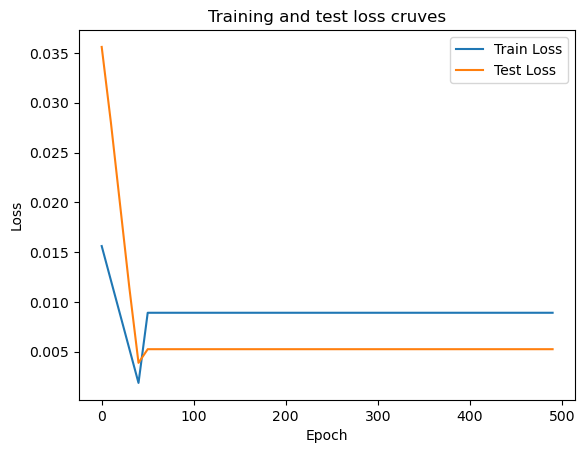

In [97]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")

plt.title("Training and test loss cruves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()


In [98]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6986]), 'bias': tensor([0.3095])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [99]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

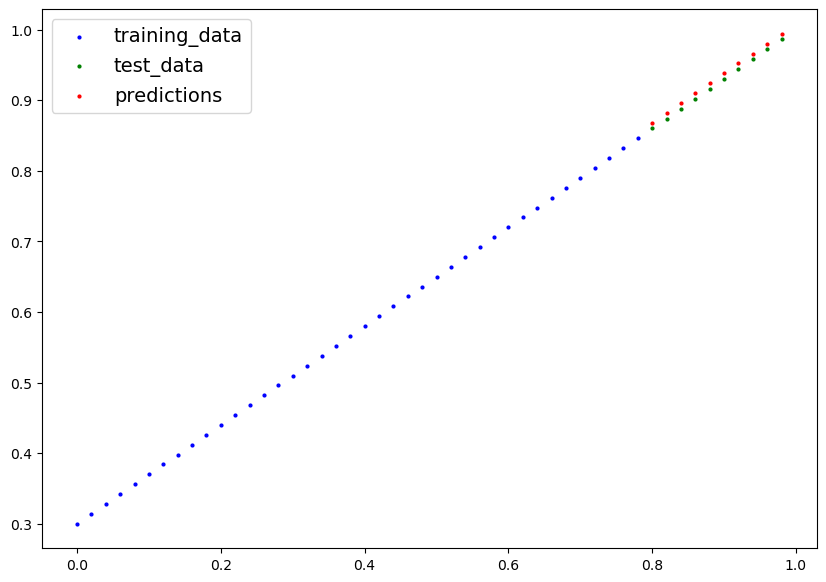

In [100]:
plot_predictions(predictions=y_preds)

In [101]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [102]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 raihan raihan 1680 Aug  4 01:21 models/01_pytorch_workflow_model_0.pth
